In [1]:
pip install datasets

DEPRECATION: Loading egg at /opt/anaconda3/lib/python3.11/site-packages/plot_model-0.20-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
Note: you may need to restart the kernel to use updated packages.


In [12]:
from datasets import list_datasets

all_datasets = list_datasets()
print(f" The total number of available datasets at Hugging Face Hub {len(all_datasets)}")
print(f" The first 10 datasets at Hugging Face Hub {all_datasets[:10]}")


 The total number of available datasets at Hugging Face Hub 332024
 The first 10 datasets at Hugging Face Hub ['FreedomIntelligence/medical-o1-reasoning-SFT', 'facebook/natural_reasoning', 'Congliu/Chinese-DeepSeek-R1-Distill-data-110k', 'open-r1/codeforces-cots', 'SmallDoge/SmallThoughts', 'gaia-benchmark/GAIA', 'open-r1/OpenR1-Math-220k', 'GeneralReasoning/GeneralThought-323K', 'fka/awesome-chatgpt-prompts', 'KodCode/KodCode-V1']


In [20]:
from datasets import load_dataset
emotions= load_dataset("emotion")


Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [24]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [26]:
train_ds = emotions["train"]

In [28]:
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [30]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [32]:
train_ds.column_names

['text', 'label']

In [34]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [36]:
train_ds[:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

In [38]:
train_ds["text"][:5]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy']

## DataFrame

In [44]:
import pandas as pd

emotions.set_format(type="pandas")
df = emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [50]:
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

In [52]:
df["label_name"] = df["label"].apply(label_int2str)

In [54]:
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


## Data Visualisation

<Axes: >

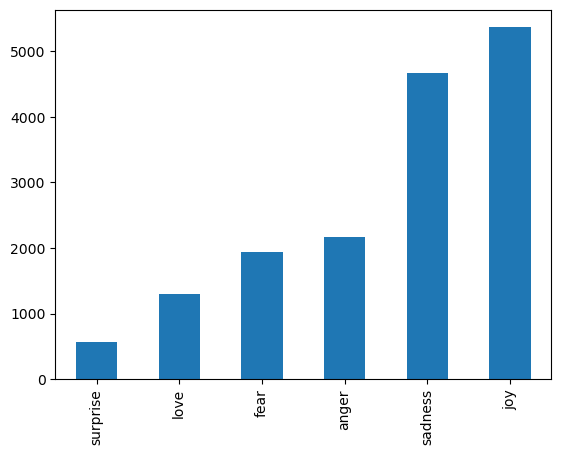

In [71]:
import matplotlib.pyplot as plt

df["label_name"].value_counts(ascending=True).plot.bar()

In [75]:
df["words_per_tweet"] = df["text"].str.split().apply(len)
df

,text,label,label_name,words_per_tweet
0,i didnt feel humiliated,0,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,10
3,i am ever feeling nostalgic about the fireplac...,2,love,18
4,i am feeling grouchy,3,anger,4
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,sadness,24
15996,i am now turning and i feel pathetic that i am...,0,sadness,20
15997,i feel strong and good overall,1,joy,6
15998,i feel like this was such a rude comment and i...,3,anger,14


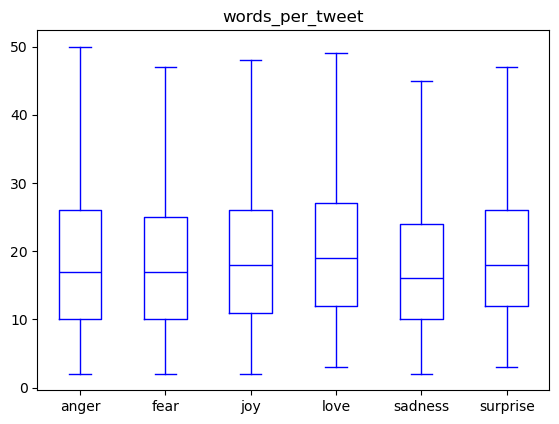

In [85]:
df.boxplot("words_per_tweet", by="label_name", grid= False, showfliers= False, color = "blue")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [93]:
type(emotions)

datasets.dataset_dict.DatasetDict

In [95]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [97]:
emotions.reset_format()

In [99]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})